In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [ ]:
df = pd.read_csv('../../../../Datasets/ML/ice_cream_data.csv')

In [18]:
X = df[['Temperature (°C)']]
y = df['Ice Cream Sales (units)']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
print("R^2 score:", model.score(X_test, y_test))

R^2 score: -0.5751270190188227


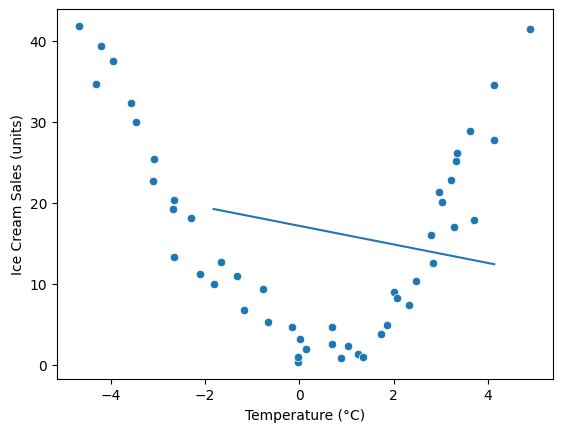

In [22]:
x_test_1d = X_test.squeeze()
y_pred_1d = np.ravel(y_pred)

sns.scatterplot(data=df, x='Temperature (°C)', y='Ice Cream Sales (units)')

sort_idx = np.argsort(x_test_1d)
sns.lineplot(x=x_test_1d.iloc[sort_idx], y=y_pred_1d[sort_idx])

plt.show()

#### after using polynomial regression.

In [23]:
X = df[['Temperature (°C)']]
y = df['Ice Cream Sales (units)']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)

In [33]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [26]:
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

In [27]:
print("R^2 on test set:", model.score(X_test_poly, y_test))

R^2 on test set: 0.8430551371938839


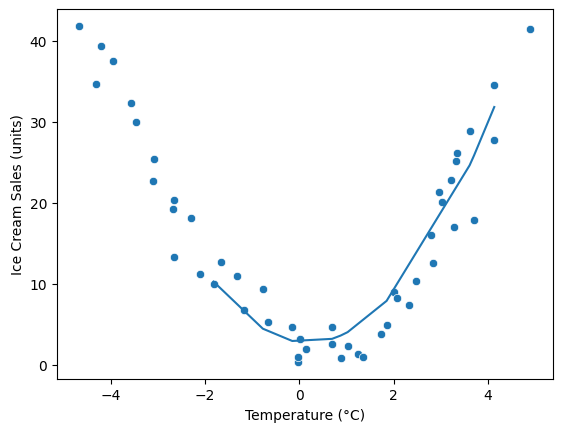

In [31]:
sns.scatterplot(data=df, x='Temperature (°C)', y='Ice Cream Sales (units)')

x_vals = X_test['Temperature (°C)'].to_numpy().flatten()
order = np.argsort(x_vals)
x_sorted = x_vals[order]
y_pred_sorted = y_pred.flatten()[order]

sns.lineplot(x=x_sorted, y=y_pred_sorted)

plt.show()